In [1]:
import tensorflow as tf

import os
import json
import numpy as np
from PIL import Image

import os.path as osp

In [2]:
pwd

u'/workspace/mnt/group/face/zhaoyafei/captcha-tensorflow'

In [3]:
digits_list = '0123456789'
lower_case_list = 'abcdefghijklmnopqrstuvwxyz'
upper_case_list = lower_case_list.upper()

char_list = digits_list + lower_case_list + upper_case_list

print 'len(char_list): ', len(char_list)
print 'char_list: ', char_list

len(char_list):  62
char_list:  0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ


In [4]:
def read_image(filename, flatten=False, width=40, height=40):
    im = Image.open(filename).convert('L').resize((width, height), Image.ANTIALIAS)

    data = np.asarray(im)
    if flatten:
        return data.reshape(width * height)

    return data

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

scores = [3.0, 1.0, 0.2]
print(softmax(scores))

[0.8360188  0.11314284 0.05083836]


In [ ]:
model_dir = './log/cnn1-run-20181105_023703/'
model_meta = model_dir + 'models-7-layers-zyf.meta'

sess = tf.Session()
saver = tf.train.import_meta_graph(model_meta)
saver.restore(sess,tf.train.latest_checkpoint(model_dir))

graph = tf.get_default_graph()

INFO:tensorflow:Restoring parameters from ./log/cnn1-run-20181105_023703/models-7-layers-zyf


In [6]:
input = graph.get_tensor_by_name('input/Placeholder:0')
prob = graph.get_tensor_by_name('readout/MatMul:0')
pred_cls = graph.get_tensor_by_name('forword-prop/ArgMax:0')

In [7]:
im_root = 'images/char-1-epoch-2000-2/test/'
im_paths = [
            '0_00ade998-201b-483f-a5e5-8acebc0b6397.png',
            '1_002f337a-4bed-49da-b990-449591dee68a.png',
            '2_01257090-7e11-4774-96c8-356e8fbcd378.png',
            '3_001e66f1-5836-46e8-8117-bad3e205d8b3.png',
            '4_00c11f9c-52d3-416c-ada9-8a532b74ec88.png',
            '5_002af014-de8f-4c07-b819-3bd41742af40.png',
            '6_00147b57-e759-45ec-b98b-93a37e802472.png',
            '7_006c8dd5-896f-45bb-856a-2ebe2dce58c4.png',
            '8_002f1de0-8102-4291-9bfb-9b440acd9971.png',
            '9_00d9f16c-3b3b-47e7-97ce-07e2ec48a97b.png',
            'a_04dde5c6-5bc2-4374-a5fd-28c145a344ea.png',
            'b_00071ee2-b636-40fe-ad77-1052d8e11750.png',
            'c_00475570-6a3c-4b58-b6d9-b6a8dc8004af.png',
            'd_0015272b-c82e-400e-bcba-e70f122be3dd.png',
            'e_0023697d-8bfa-40bb-91c5-b8ebf1e98019.png',
            'f_00e156dd-52a7-40b0-9ec3-b687490f6d8b.png',
            'g_001e0061-84cf-4c6b-b098-1fe92f09b7db.png',
            'h_0036ed49-f6cb-4fbf-a428-48799e3e2c8f.png',
            'i_016e136e-477b-4135-8c4f-52be1d992ace.png',
            'j_004d81df-0c4b-4918-b133-1a9f8ad7be69.png',
            'k_0163dcee-8b14-408a-b201-2c99ca3a1f4d.png',
            'l_002c5ffa-4971-47d3-9245-e5c30a872544.png',
            'm_002d9294-b576-4c3e-88a6-d62b84fb2bc0.png',
            'n_00eb1169-ad34-4771-ab6d-be7ab0e9a8a7.png',
            'o_00213729-8c05-4535-b1f0-29360ecb8ba5.png',
            'p_004aaaa1-e068-4d60-930b-280cc2348368.png',
            'q_0096d197-3066-4690-bf49-d72da777d441.png',
            'r_0106083b-fc86-4210-a638-985252e361f0.png',
            's_00ce5c6f-a321-4af8-94ca-5328ee9cd3ff.png',
            't_005ce3a1-3491-44ca-808c-77ff9f12b513.png',
            'u_009c735f-b5d0-4d8d-8f89-d13f63ef7fea.png',
            'v_00a73d5a-2201-4b39-830d-63d3552555b2.png',
            'w_01ad5dfc-7f8f-44c2-b71a-447710b67c4d.png',
            'x_00c9133b-e9c6-4c69-88f3-2e7614dba48e.png',
            'y_0048aa3f-97df-4dc8-8e54-e26e1d965ac5.png',
            'z_018747ad-c708-4db3-877c-d72a1a6718a1.png',
            'A_0040f572-8ec8-4ffb-b716-72e8a9ab8cff.png',
            'B_00b6f193-9fa2-4559-8dcd-4b1c7a1619d3.png',
            'C_001c9a1b-d363-4465-8ea8-391e6bd38515.png',
            'D_00862abb-40c1-4393-b024-fba120f78e6b.png',
            'E_0083a449-234c-4a07-ae0f-e84ef7169b3b.png',
            'F_001fbf90-e965-4ca0-b4d4-51eef67e80b4.png',
            'G_006a152d-9057-45df-89b7-fa3a3572aeec.png',
            'H_0006a4ad-e594-4e45-86c7-f14c57cc8af7.png',
            'I_008305bc-accd-437b-bb2e-f863ca8e2753.png',
            'J_0085940a-f2de-4cf8-9f14-f22bf6b8512c.png',
            'K_004d4c4d-f7da-445f-ba18-a8281d3ed615.png',
            'L_00183ea7-957d-43a1-b869-63196d359829.png',
            'M_009b6e47-7c22-4cd8-a297-913d7ecb06ec.png',
            'N_005e190e-7946-40c5-ba10-155147717c64.png',
            'O_008d876b-0709-4677-89f1-05fa10969b7e.png',
            'P_00ec7c2f-2bd1-4db2-83cb-c967e9ed78eb.png',
            'Q_004da8c4-e11a-43df-8d5d-d2f78d341c0f.png',
            'R_00412e5f-ace1-494b-b9ff-0308f4a22dde.png',
            'S_00518229-ea8c-4433-b663-ef4997ba7ff4.png',
            'T_000d17de-2f82-453c-a467-f22f08e56bda.png',
            'U_00066274-83cb-4bcf-9b3d-7a2e88c82d70.png',
            'V_00fde4f2-ad5b-451a-987a-0e1f488b96ab.png',
            'W_0027dcff-75c9-4115-adfb-ec4ac2ca45b8.png',
            'X_00d3ec0f-21a4-415a-b9df-354810f0f9d7.png',
            'Y_006107a7-f996-4c98-8bbf-626534626e3a.png',
            'Z_008cf252-2faf-4ec0-ba89-53cffa6a9d65.png'    
           ]

im_data_list = []
for im_fn in im_paths:
    im_data =  read_image(osp.join(im_root, im_fn))
#     print im_data.shape
#     print im_data

    im_data_list.append(im_data)

im_data_batch = np.array(im_data_list)    
print 'input batch shape: ', im_data_batch.shape

input batch shape:  (62, 40, 40)


In [8]:
feed_dict = {input:im_data_batch.astype(np.float)}

prob_rlt, pred_rlt = sess.run([prob, pred_cls], feed_dict)

# pred_rlt = sess.run(pred_cls, feed_dict)
print prob_rlt[0]
print pred_rlt

prob_list = []
pred_char_list = []
for i,idx in enumerate(pred_rlt):
    prob_list.append(softmax(prob_rlt[i])[idx])
    pred_char_list.append(char_list[idx])

print 'Predicted chars: ', pred_char_list
print 'max prob: ', prob_list

[-35.774044   -46.31912    -47.43007    -74.00457     -0.32524988
 -62.593513   -23.930973   -38.55609    -26.010826   -65.90489
  -9.10024    -35.845703     2.2109694  -37.71652     -1.3931856
   1.4116533   13.944871   -18.339458   -11.756675   -43.401974
   5.92936    -15.208061    -3.2652514    0.67573434 -51.91795
 -32.32315      1.2999543    4.474277    -4.9936266   22.25915
  -0.38426733  -9.851881     7.335829    18.704292   -27.866753
   9.781547    -9.061827     7.5158677  -26.338055   -37.197212
  34.11337     29.776836    35.434113    38.25283     10.289043
 -28.022678    28.182053    15.316484    30.480202    20.285255
 -11.16857     -1.9267353   -9.417403    28.212193     3.2198155
   6.6467605    0.926947   -10.464247    22.72921     28.069904
  -1.1813376   29.717     ]
[43 61 61 29 61 59 46 59  8 48 17 16 61 17 54 40 61 61 18 33 43 61 48 20
  4 20 46 48 16 61 61 61 32 61 60 54 44 43 40 60 40 61 33 46 58 61 61 40
 48 59 19 40 48 20 45 43 46 48 43 59 48 61]
Predicted cha

In [9]:
var = graph.get_tensor_by_name('convolution-layer-1/truncated_normal_1/stddev:0')
sess.run(var)

0.1

In [8]:
print graph.get_name_scope()
# print graph.get_operations()

segm_captcha.py
---> Process image:  ./test-img/webcode_02.png
rescale:  1.25
img.shape:  (50, 200)
horizontal zero crossings:  [ 33  52  66  94 108 163]
zero-cross points:  [ 33  52  66  94 108 163]
num of zero-cross points:  6
peak widths:  [19 28 55]
max peak idx:  2
Otsu threshold is:  137
horizontal segm points:  [ 33  52  66  94 108 137 137 163]
vertical zero crossings for sub regions:  [20 40]
---> segm shape (26, 24)
vertical zero crossings for sub regions:  [ 4 39]
---> segm shape (44, 35)
vertical zero crossings for sub regions:  [26]
---> segm shape (27, 36)
vertical zero crossings for sub regions:  [ 7 41]
---> segm shape (44, 33)
input batch shape:  (4, 40, 40)
[-40.850952    14.033806     9.173605   -23.605268    10.805414
 -14.876675   -31.807737   -31.451588   -38.322464   -75.59795
  -0.86611176  10.81913    -18.72551    -21.381086   -60.786957
  19.078596   -20.170832    46.957237    38.091187    13.743644
  31.374575    12.895546   -11.685399     1.618989   -84.78506

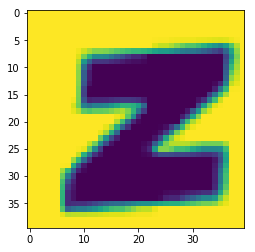

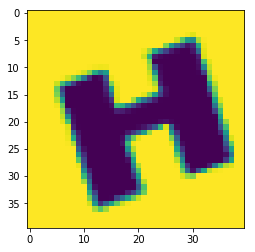

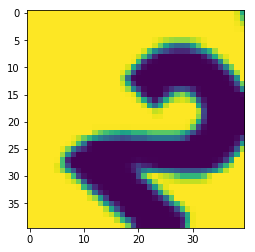

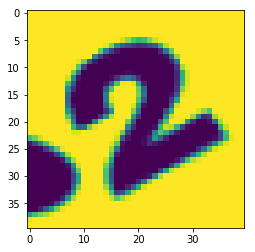

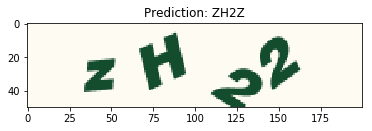

In [10]:
import segm_captcha
from segm_captcha import read_and_segment, resize_regions
import cv2
from collections import OrderedDict

%matplotlib inline

import matplotlib
# import numpy as np
import matplotlib.pyplot as plt


print segm_captcha.__file__


def crack_captcha(captcha_fn, top_n=5):
    seg_regions = read_and_segment(captcha_fn, 1.25)
    resized_regions = resize_regions(seg_regions)
    
    for i, rregi in enumerate(resized_regions):
        save_fn = captcha_fn + '_' + str(i) + '.png'
        cv2.imwrite(save_fn, rregi)

    im_data_batch = np.array(resized_regions)
    print 'input batch shape: ', im_data_batch.shape
    
    for im in im_data_batch:
        plt.figure()
        plt.imshow(im)
        

    feed_dict = {input:im_data_batch.astype(np.float)}
    prob_rlt, pred_rlt = sess.run([prob, pred_cls], feed_dict)

    # pred_rlt = sess.run(pred_cls, feed_dict)
    print prob_rlt[0]
    print pred_rlt  

    pred_rlt_list =[]

    for i,idx in enumerate(pred_rlt):
        print '--->'
        pred_dict = OrderedDict()
        probs = softmax(prob_rlt[i])
        
        top_n_idx = np.argsort(-prob_rlt[i])[0:top_n]
        print top_n_idx
        for ii, iidx in enumerate(top_n_idx):
            iidx = int(iidx)
            print 'top_%d: idx=%d, char=%s, logit=%f, prob=%f' % (ii, iidx, char_list[iidx], prob_rlt[i][iidx], probs[iidx])
            pred_dict[char_list[iidx]] = probs[iidx]
            
        pred_rlt_list.append(pred_dict)

    return pred_rlt_list

captcha_fn = r'./test-img/webcode_02.png'

pred_rlt_list = crack_captcha(captcha_fn)
pred_chars = ''
for rlt in pred_rlt_list:
    print 'Predicted chars: ', rlt
#     print rlt.keys()
    pred_chars += rlt.keys()[0]
    
im = cv2.imread(captcha_fn)

plt.figure()
plt.title('Prediction: ' + pred_chars)
plt.imshow(im)

In [10]:
pred_rlt_list[0]


OrderedDict([('Z', 1.0),
             ('A', 1.0240447e-18),
             ('z', 1.5323719e-19),
             ('E', 3.857881e-20),
             ('x', 7.6176524e-22)])

In [95]:
pwd

u'/workspace/mnt/group/face/zhaoyafei/captcha-tensorflow/log/cnn1-run-20181030_200154'